# Mutual Funds Portfolio Part 2 

https://en.wikipedia.org/wiki/Mutual_fund

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['WSHFX', 'TMSIX', 'VSCAX','BRXAX', 'TSORX', 'JGIAX', 'ACEIX']
start = '2016-01-01'
end = '2023-02-16'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  7 of 7 completed


,ACEIX,BRXAX,JGIAX,TMSIX,TSORX,VSCAX,WSHFX
Date,,,,,,,
2016-01-04 00:00:00-05:00,5.899168,7.698412,6.608236,13.689376,7.972788,7.909476,24.379837
2016-01-05 00:00:00-05:00,5.892991,7.690377,6.608236,13.742489,7.946591,7.834764,24.457256
2016-01-06 00:00:00-05:00,5.825042,7.577875,6.622630,13.516766,7.824337,7.630552,24.108881
2016-01-07 00:00:00-05:00,5.713853,7.425192,6.608236,13.211377,7.693349,7.331705,23.566963
2016-01-08 00:00:00-05:00,5.664436,7.336797,6.615432,13.018851,7.606024,7.182283,23.315357


In [3]:
df.tail()

,ACEIX,BRXAX,JGIAX,TMSIX,TSORX,VSCAX,WSHFX
Date,,,,,,,
2023-02-09 00:00:00-05:00,10.23,11.89,8.39,33.490002,12.04,18.719999,52.779999
2023-02-10 00:00:00-05:00,10.26,11.80,8.35,33.430000,11.98,18.820000,53.160000
2023-02-13 00:00:00-05:00,10.32,11.88,8.36,33.869999,12.09,19.049999,53.639999
2023-02-14 00:00:00-05:00,10.31,11.92,8.33,33.959999,12.09,19.120001,53.459999
2023-02-15 00:00:00-05:00,10.30,11.83,8.33,34.209999,12.05,19.129999,53.439999


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
7 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

7 years


In [7]:
delta = d1 - d2
years = relativedelta.relativedelta(d2,d1).years
years

7

In [8]:
r = relativedelta.relativedelta(d1, d2)
months = -(r.months + (12*r.years))
months

85

In [9]:
delta = d1 - d2
days = delta.days
-(days)

2603

In [10]:
print("Years of Investing: %s" % years)
print("Months of Investing: %s" % months)
print("Days of Investing: %s" % -days)

Years of Investing: 7
Months of Investing: 85
Days of Investing: 2603


In [11]:
diff = relativedelta.relativedelta(d2, d1)

years = diff.years
months = diff.months
days = diff.days

print('Long term Investing Dates:')
print('{} years {} months {} days'.format(years, months, days))

Long term Investing Dates:
7 years 1 months 15 days


In [12]:
Number_of_Stocks = len(symbols)
Number_of_Stocks

7

In [13]:
percent_invest = round((100/Number_of_Stocks)/100,2)
percent_invest

0.14

In [14]:
print('Percentage of invest:')
Cash = 100000
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    percentages = (round(cost,3)/Cash)*100
    print('{}: {}%'.format(i, percentages))

Percentage of invest:
ACEIX: 14.000000000000002%
BRXAX: 14.000000000000002%
JGIAX: 14.000000000000002%
TMSIX: 14.000000000000002%
TSORX: 14.000000000000002%
VSCAX: 14.000000000000002%
WSHFX: 14.000000000000002%


In [15]:
print('Number of Shares:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    print('{}: {}'.format(i, shares))

Number of Shares:
ACEIX: 2373
BRXAX: 1818
JGIAX: 2118
TMSIX: 1022
TSORX: 1755
VSCAX: 1770
WSHFX: 574


In [16]:
print('Beginning Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Begin_Value = round(shares * x, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
ACEIX: $13998.72
BRXAX: $13995.71
JGIAX: $13996.24
TMSIX: $13990.54
TSORX: $13992.24
VSCAX: $13999.77
WSHFX: $13994.03


In [17]:
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
ACEIX: $24441.9
BRXAX: $21506.94
JGIAX: $17642.94
TMSIX: $34962.62
TSORX: $21147.75
VSCAX: $33860.1
WSHFX: $30674.56


In [18]:
print('Short Selling')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Short Selling
Current Value:
ACEIX: $8016.97
BRXAX: $9107.22
JGIAX: $11101.84
TMSIX: $5598.95
TSORX: $9256.41
VSCAX: $5781.83
WSHFX: $6363.14


In [19]:
short_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    short_result.append(Current_Value)
print('Total Value of Shorting: $%s' % round(sum(short_result),2))

Total Value of Shorting: $55226.36


In [20]:
print('Buy Long')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Buy Long
Current Value:
ACEIX: $24441.9
BRXAX: $21506.94
JGIAX: $17642.94
TMSIX: $34962.62
TSORX: $21147.75
VSCAX: $33860.1
WSHFX: $30674.56


In [21]:
long_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    long_result.append(Current_Value)
print('Total Long Value: $%s' % round(sum(long_result),2))

Total Long Value: $184236.81


In [22]:
print('Which is more profit? Long or Short?')
print('Total Value of Long: $%s' % round(sum(long_result),2))
print('Total Value of Shorting: $%s' % round(sum(short_result),2))
if sum(short_result) >= sum(long_result):
   print("Short the portfolio!")
else:
   print("Long the portfolio!")

Which is more profit? Long or Short?
Total Value of Long: $184236.81
Total Value of Shorting: $55226.36
Long the portfolio!


In [23]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {:.2f}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: ACEIX: 74.60%
Holding Period Return: BRXAX: 53.67%
Holding Period Return: JGIAX: 26.05%
Holding Period Return: TMSIX: 149.90%
Holding Period Return: TSORX: 51.14%
Holding Period Return: VSCAX: 141.86%
Holding Period Return: WSHFX: 119.20%


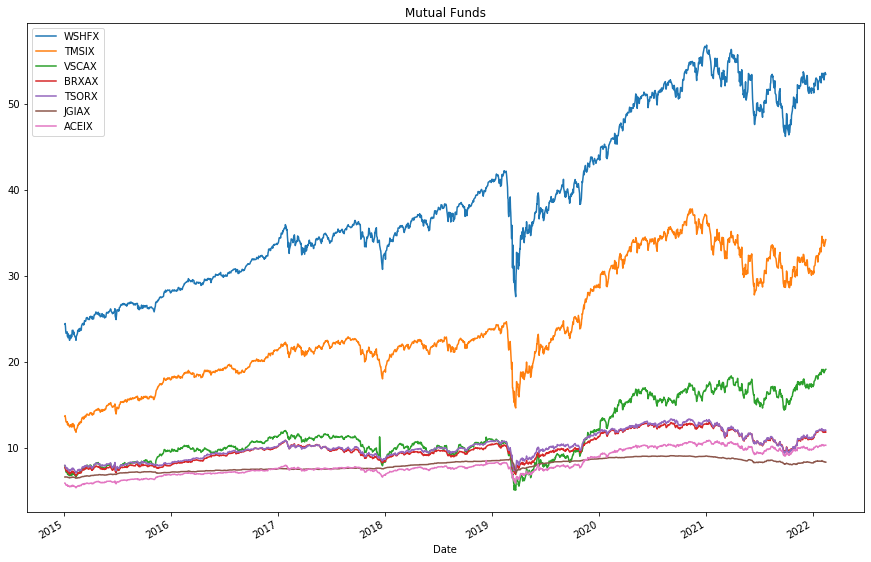

In [24]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Mutual Funds')
plt.legend()

In [25]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

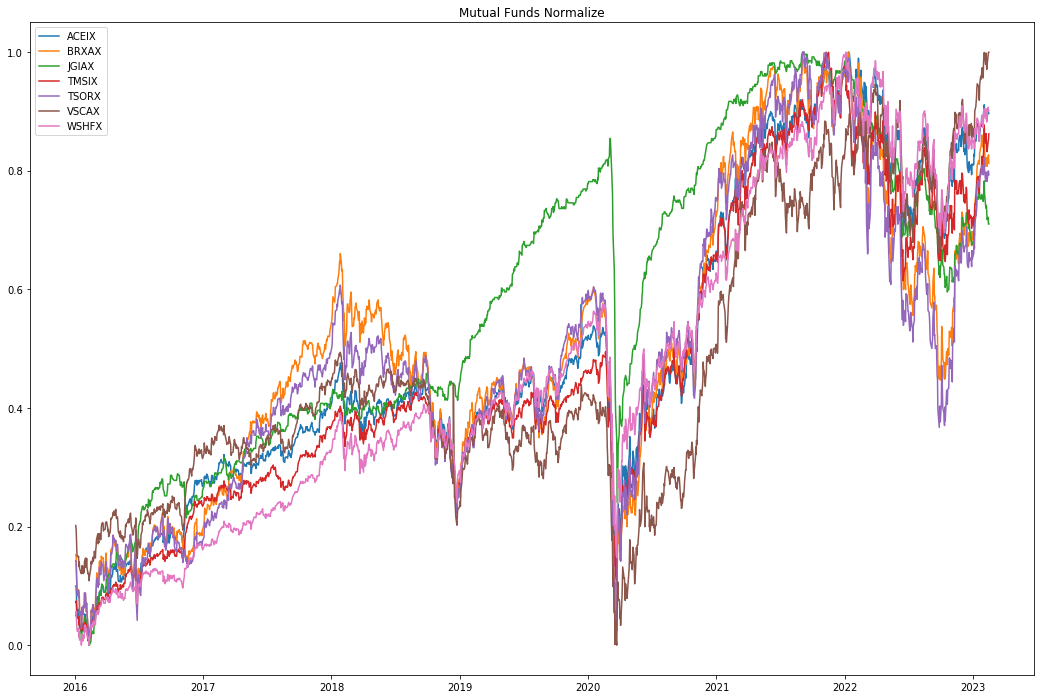

In [26]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Mutual Funds Normalize')
plt.legend(labels=normalize.columns)

In [27]:
df.min()

ACEIX     5.349402
BRXAX     6.742139
JGIAX     6.479026
TMSIX    11.810574
TSORX     7.082071
VSCAX     5.073456
WSHFX    22.502483
dtype: float64

In [28]:
for s in symbols:
    print(s + ":",  df[s].max())

WSHFX: 56.82856750488281
TMSIX: 37.7906608581543
VSCAX: 19.1299991607666
BRXAX: 13.004905700683594
TSORX: 13.346033096313477
JGIAX: 9.086079597473145
ACEIX: 10.870545387268066


In [29]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,WSHFX Return,TMSIX Return,VSCAX Return,BRXAX Return,TSORX Return,JGIAX Return,ACEIX Return
Date,,,,,,,
2016-01-05 00:00:00-05:00,0.003176,0.003880,-0.009446,-0.001044,-0.003286,0.000000,-0.001047
2016-01-06 00:00:00-05:00,-0.014244,-0.016425,-0.026065,-0.014629,-0.015385,0.002178,-0.011531
2016-01-07 00:00:00-05:00,-0.022478,-0.022593,-0.039164,-0.020149,-0.016741,-0.002173,-0.019088
2016-01-08 00:00:00-05:00,-0.010676,-0.014573,-0.020380,-0.011905,-0.011351,0.001089,-0.008649


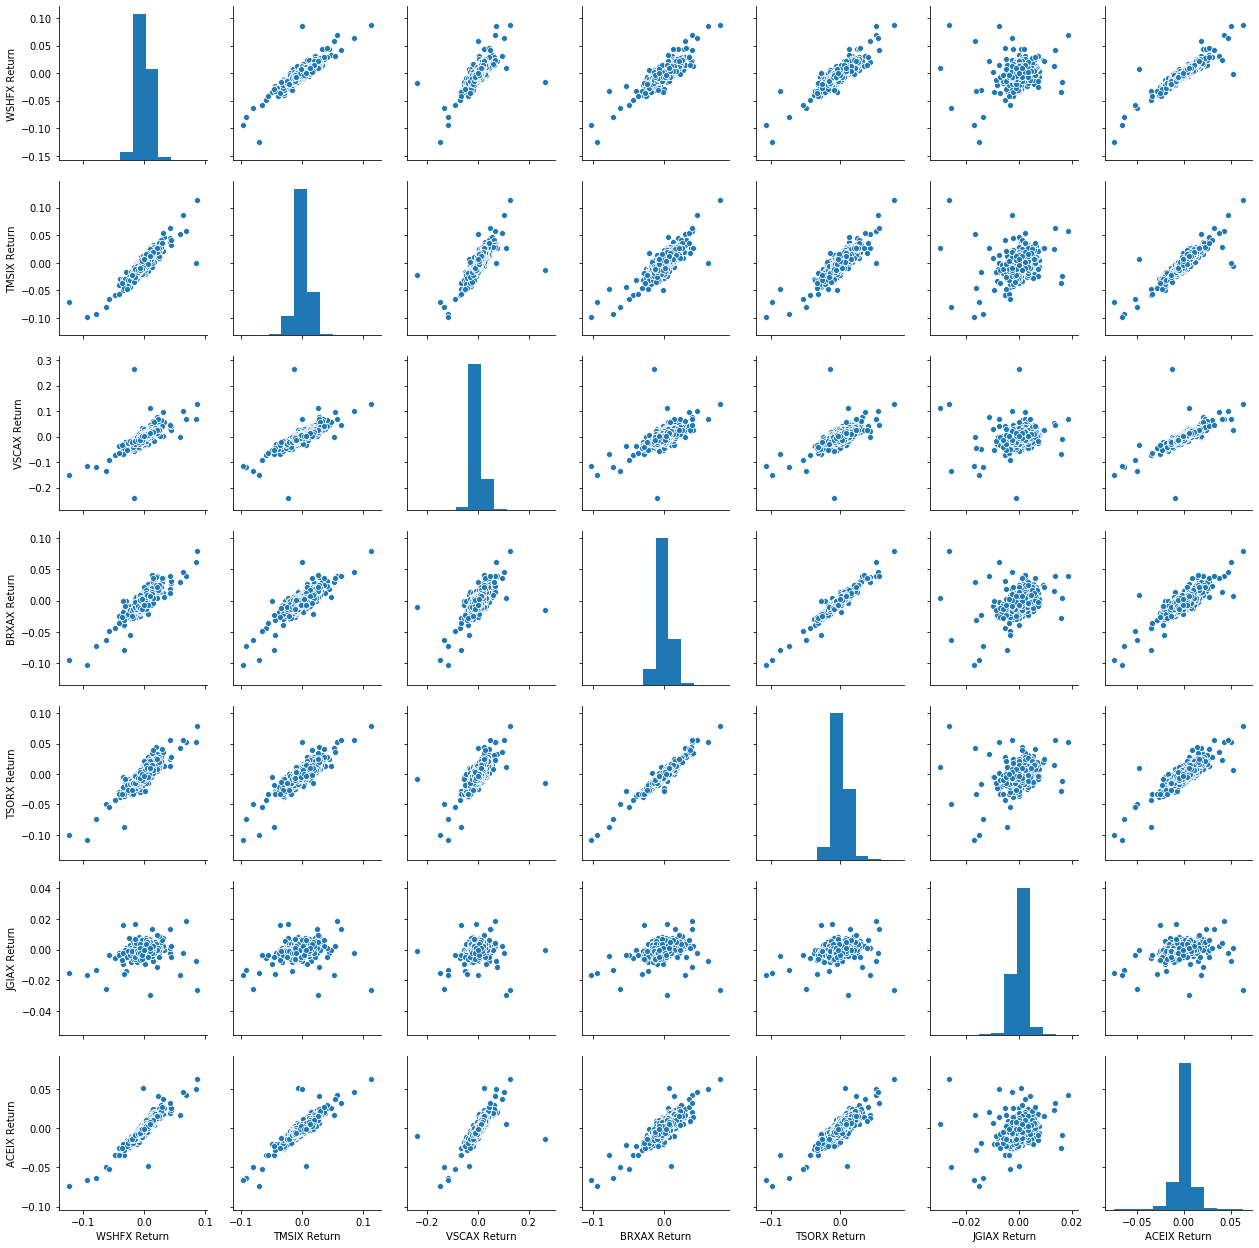

In [30]:
sns.pairplot(returns[1:])

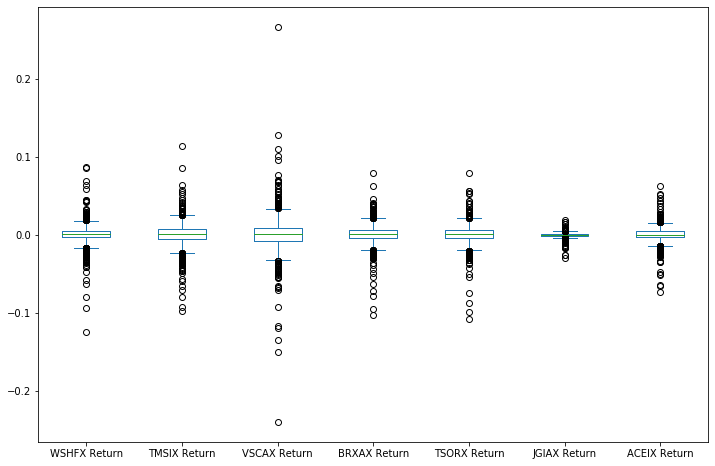

In [31]:
returns.plot(kind='box',figsize=(12,8))

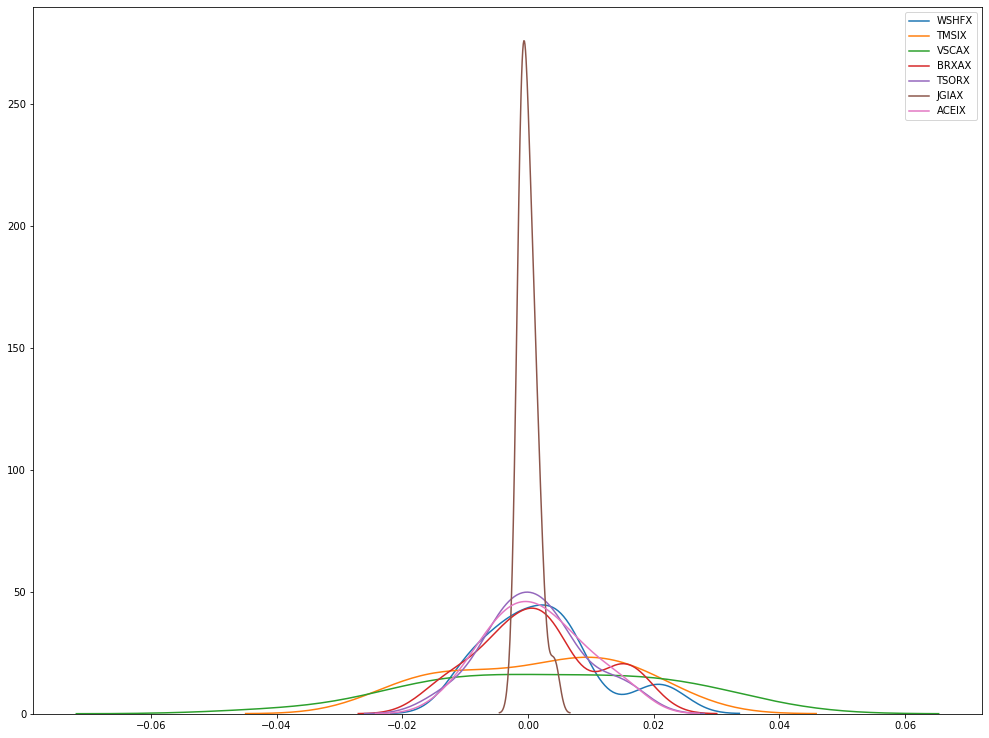

In [32]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.loc["2021-03-01" : "2021-03-31 "][r])
    plt.legend(labels=symbols)

In [33]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

WSHFX Return   2020-03-24 00:00:00-04:00
TMSIX Return   2020-03-24 00:00:00-04:00
VSCAX Return   2018-12-14 00:00:00-05:00
BRXAX Return   2020-03-24 00:00:00-04:00
TSORX Return   2020-03-24 00:00:00-04:00
JGIAX Return   2020-03-26 00:00:00-04:00
ACEIX Return   2020-03-24 00:00:00-04:00
dtype: datetime64[ns, America/New_York]


In [34]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

WSHFX Return   2020-03-16 00:00:00-04:00
TMSIX Return   2020-03-12 00:00:00-04:00
VSCAX Return   2018-12-17 00:00:00-05:00
BRXAX Return   2020-03-12 00:00:00-04:00
TSORX Return   2020-03-12 00:00:00-04:00
JGIAX Return   2020-03-19 00:00:00-04:00
ACEIX Return   2020-03-16 00:00:00-04:00
dtype: datetime64[ns, America/New_York]


In [35]:
returns.corr()

,WSHFX Return,TMSIX Return,VSCAX Return,BRXAX Return,TSORX Return,JGIAX Return,ACEIX Return
WSHFX Return,1.000000,0.902104,0.752935,0.843589,0.862950,0.253900,0.925005
TMSIX Return,0.902104,1.000000,0.809335,0.810956,0.831862,0.262741,0.909829
VSCAX Return,0.752935,0.809335,1.000000,0.695005,0.703928,0.183380,0.821418
BRXAX Return,0.843589,0.810956,0.695005,1.000000,0.960743,0.330807,0.832295
TSORX Return,0.862950,0.831862,0.703928,0.960743,1.000000,0.316251,0.848193
JGIAX Return,0.253900,0.262741,0.183380,0.330807,0.316251,1.000000,0.279897
ACEIX Return,0.925005,0.909829,0.821418,0.832295,0.848193,0.279897,1.000000


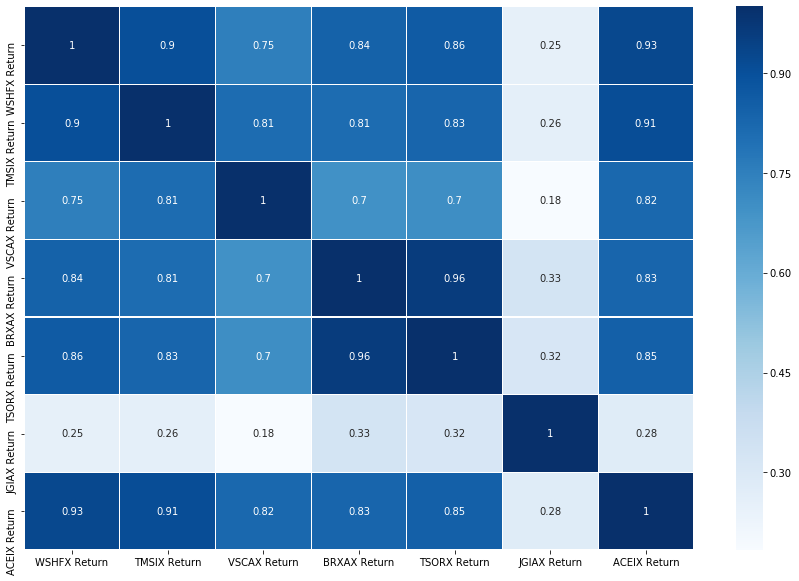

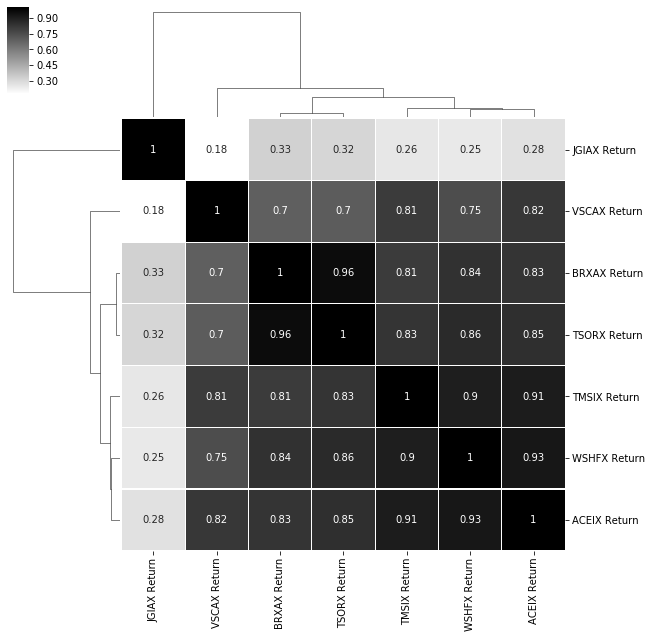

In [36]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

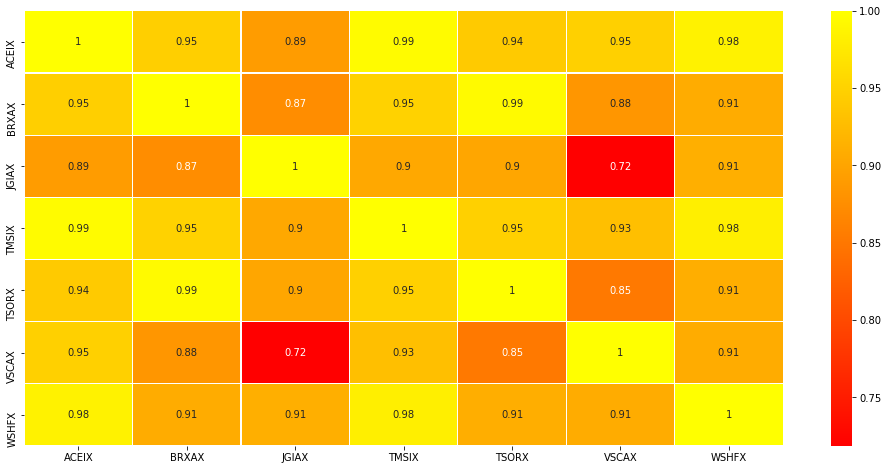

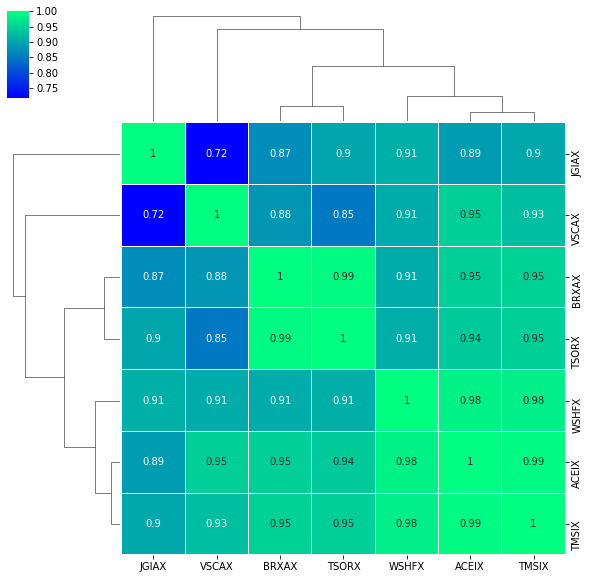

In [37]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

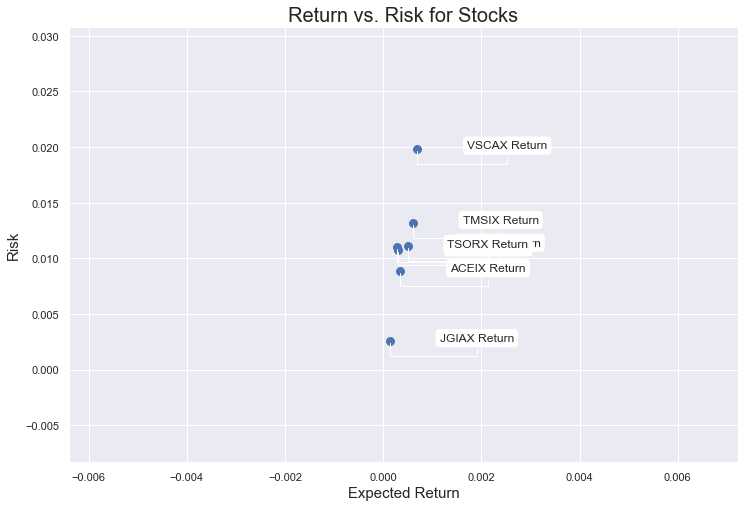

In [38]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [39]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [40]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [41]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.01098813 -0.01343411 -0.00314416 -0.01629367 -0.01385173 -0.02476373
                     -0.01376387]
95%                 [-0.01420244 -0.01732688 -0.00407305 -0.02108234 -0.01786126 -0.03197996
                     -0.0178076 ]
99%                 [-0.02023193 -0.02462907 -0.00581549 -0.03006508 -0.02538248 -0.0455164
                     -0.02539298]


In [42]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
ACEIX: -0.011
BRXAX: -0.0134
JGIAX: -0.0031
TMSIX: -0.0163
TSORX: -0.0139
VSCAX: -0.0248
WSHFX: -0.0138


In [43]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${:.2f}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 90%:
ACEIX: $1000.00
BRXAX: $1000.00
JGIAX: $0.00
TMSIX: $2000.00
TSORX: $1000.00
VSCAX: $2000.00
WSHFX: $1000.00


In [44]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${:.2f}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 99%:
ACEIX: $2000.00
BRXAX: $2000.00
JGIAX: $1000.00
TMSIX: $3000.00
TSORX: $3000.00
VSCAX: $5000.00
WSHFX: $3000.00
